# Soal 1. Kaggle

![title](Kaggle_Titanic.png)

# Soal 2. Sentimen Analisis

## Dataset

In [3]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

# for reproducibility
random_state = 0

full_df = pd.read_csv("tbl_cnn.csv")
df = full_df[["content"]]
df["text"] = df["content"].astype(str)
full_df.head(1)

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage
0,610a281ce12961efb18c37ff,CNN Indonesia,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/202108041...,https://akcdn.detik.net.id/visual/2020/08/11/i...


In [4]:
df.head()

,content,text
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers..."
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...


## Case Folding

### Penjelasan : Dilakukan untuk standarize pada teks (seperti dibuat hurus kecil semua)

In [5]:
df["text_lower"] = df["text"].str.lower()
df.head(1)

,content,text,text_lower
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,menteri ketenagakerjaan (menaker) ida fauziyah...


In [6]:
df.shape

(16792, 3)

In [7]:
df = df.drop_duplicates(subset=['content'])
df.shape

(7017, 3)

## removing punctuation

### Penjelasan : Membuat kalimat menjadi terpisah (layaknya token)

In [8]:
df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,content,text,text_wo_punct
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 persen ...
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid19 di Indonesia ...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...


## Remove New Line

### Penjelasan : Digunakan untuk membuang token (kata) yang dianggap tidak penting

### Penggunaan library sastrawi yang mendukung dalam text processing berbahasa indonesia dimana didalamnya dapat mengidentifikasi kata-kata imbuhan yang memungkinakan untuk dipisah agar tida digunakan dalam data processing

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

## Stop words

### Penjelasan : Proses ini digunakan untuk mengambil token (kata) yang dianggap penting

In [10]:
STOPWORDS = stopwords
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,content,text,text_wo_punct,text_wo_stop
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 persen ...,Harga Batu bara Acuan HBA menguat 1355 persen ...
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid19 di Indonesia ...,Capaian jumlah vaksinasi Covid19 Indonesia mer...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,Badan Nasional Penanggulangan Bencana BNPB mel...


In [11]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('Covid19', 9918),
 ('tersebut', 9509),
 ('kasus', 7593),
 ('Indonesia', 7296),
 ('kata', 7157),
 ('persen', 6288),
 ('menjadi', 6195),
 ('orang', 5995),
 ('lebih', 5175),
 ('pemerintah', 4716)]

In [12]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,content,text,text_wo_punct,text_wo_stop,text_wo_stopfreq
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 persen ...,Harga Batu bara Acuan HBA menguat 1355 persen ...,Harga Batu bara Acuan HBA menguat 1355 US13099...
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid19 di Indonesia ...,Capaian jumlah vaksinasi Covid19 Indonesia mer...,Capaian jumlah vaksinasi merata Beberapa provi...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,Badan Nasional Penanggulangan Bencana BNPB mel...,Badan Nasional Penanggulangan Bencana BNPB mel...


In [13]:
# Drop the two columns which are no more needed 
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

,content,text,text_wo_stopfreq,text_wo_stopfreqrare
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,Harga Batu bara Acuan HBA menguat 1355 US13099...
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,Capaian jumlah vaksinasi merata Beberapa provi...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,Badan Nasional Penanggulangan Bencana BNPB mel...


In [14]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
df.drop(["text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stopfreq"].apply(lambda text: stem_words(text))
df.head()

,content,text,text_wo_stopfreq,text_stemmed
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...


In [15]:
df.shape

(7017, 4)

In [16]:
# def remove_emoji(string):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', string)

# remove_emoji("game is on 🔥🔥")

In [17]:
# remove_emoji("Hilarious😂")

## Processing (Unsupervised Algorithm - K-Means)

### Penjelasan : Digunakan untuk memeberikan label, karena data awal belum adanya label, maka pemilihan algoritma unsupervised dianggap tepat untuk data tersebut.

In [18]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [19]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
# import xgboost as xgb

from sklearn.cluster import MeanShift
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
new_df = df["text_stemmed"]
new_df.head()

0    menteri ketenagakerjaan menak ida fauziyah mem...
1    anggota komisi ii dpr fraksi golkar zulfikar a...
2    harga batu bara acuan hba menguat 1355 us13099...
3    capaian jumlah vaksinasi merata beberapa provi...
4    badan nasion penanggulangan bencana bnpb melal...
Name: text_stemmed, dtype: object

In [21]:
# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)

In [22]:
# stopwords
# df = new_df
# text = new_df['text_lemmatized']
# new_df = new_df.drop_duplicates(subset=['content'])
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(new_df.values)
features = vec.transform(new_df.values)
# print(features)

In [23]:
cls = MiniBatchKMeans(n_clusters=7, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(n_clusters=7, random_state=0)

In [24]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
a = cls.labels_
a

array([3, 0, 0, ..., 3, 0, 0])

In [25]:
from sklearn.metrics import homogeneity_score
homogeneity_score(a, cls.predict(features))

1.0

In [26]:
# label
x = pd.DataFrame(a, columns=['Kategori'])
x.head()
# df['Label'] = 

,Kategori
0,3
1,0
2,0
3,5
4,3


In [27]:
# x['Kategori'].replace(2, 'Ekonomi',inplace=True)

df.head(10)

,content,text,text_wo_stopfreq,text_stemmed
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...
5,"Menteri Energi dan Sumber Daya Alam Malaysia, ...","Menteri Energi dan Sumber Daya Alam Malaysia, ...",Menteri Energi Sumber Daya Alam Malaysia Shams...,menteri energi sumber daya alam malaysia shams...
6,Harga jual emas PT Antam (Persero) Tbk berada ...,Harga jual emas PT Antam (Persero) Tbk berada ...,Harga jual emas PT Antam Persero Tbk berada po...,harga jual ema pt antam persero tbk berada pos...
7,Keributan dan perang kata terjadi antara atlet...,Keributan dan perang kata terjadi antara atlet...,Keributan perang terjadi atlet Meksiko insiden...,keributan perang terjadi atlet meksiko insiden...
8,Pemerintah akan membenahi data vaksinasi Covid...,Pemerintah akan membenahi data vaksinasi Covid...,Pemerintah membenahi data vaksinasi usai warga...,pemerintah membenahi data vaksinasi usai warga...
9,Musisi dan pentolan grup band Dewa 19 Ahmad Dh...,Musisi dan pentolan grup band Dewa 19 Ahmad Dh...,Musisi pentolan grup band Dewa 19 Ahmad Dhani ...,musisi pentolan grup band dewa 19 ahmad dhani ...


In [28]:
result_clust = pd.concat([df,x], axis=1)
result_clust.head()

,content,text,text_wo_stopfreq,text_stemmed,Kategori
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,3.0
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,0.0
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,0.0
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,5.0
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,3.0


In [29]:
# result_clust.isnull().sum()

In [30]:
result_clust = result_clust.drop_duplicates(subset=['content'])
result_clust.shape

(7017, 5)

In [31]:
result_clust = result_clust.dropna()

In [32]:
result_clust.isnull().sum()

content             0
text                0
text_wo_stopfreq    0
text_stemmed        0
Kategori            0
dtype: int64

In [33]:
# clust_0 = result_clust[result_clust['Kategori'] ==0]
# clust_0.head(10)

In [34]:
# Hiburan
# result_clust['Kategori'].replace(np.nan, 9)

In [35]:
# Ekonomi Bisnis
clust_0 = result_clust[result_clust['Kategori'] ==0]
clust_0.tail(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori
7000,Penyidik Komisi Pemberantasan Korupsi (KPK) no...,Penyidik Komisi Pemberantasan Korupsi (KPK) no...,Penyidik Komisi Pemberantasan Korupsi KPK nona...,penyidik komisi pemberantasan korupsi kpk nona...,0.0
7003,"Ganda putri Indonesia, Greysia Polii/Apriyani ...","Ganda putri Indonesia, Greysia Polii/Apriyani ...",Ganda putri Greysia PoliiApriyani Rahayu mengu...,ganda putri greysia poliiapriyani rahayu mengu...,0.0
7005,Kementerian Ketenagakerjaan sedang menyiapkan ...,Kementerian Ketenagakerjaan sedang menyiapkan ...,Kementerian Ketenagakerjaan sedang menyiapkan ...,kementerian ketenagakerjaan sedang menyiapkan ...,0.0
7006,Pengusaha berharap agar pemerintah melonggarka...,Pengusaha berharap agar pemerintah melonggarka...,Pengusaha berharap melonggarkan PPKM level 4 b...,pengusaha berharap melonggarkan ppkm level 4 b...,0.0
7007,Selebritas Raffi Ahmad mengungkap kenangan kon...,Selebritas Raffi Ahmad mengungkap kenangan kon...,Selebritas Raffi Ahmad mengungkap kenangan kon...,selebrita raffi ahmad mengungkap kenangan kony...,0.0
7009,Bintang serial General Hospital Jay Pickett me...,Bintang serial General Hospital Jay Pickett me...,Bintang serial General Hospital Jay Pickett me...,bintang serial gener hospit jay pickett mening...,0.0
7010,PT Garuda Indonesia (Persero) batal digugat pa...,PT Garuda Indonesia (Persero) batal digugat pa...,PT Garuda Persero batal digugat pailit Lessor ...,pt garuda persero batal digugat pailit lessor ...,0.0
7012,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales MMKSI meng...,mitsubishi motor krama yudha sale mmksi mengkl...,0.0
7015,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona dilakukan masif...,program vaksinasi viru corona dilakukan masif ...,0.0
7016,Mayoritas harga uang kripto bergerak di zona m...,Mayoritas harga uang kripto bergerak di zona m...,Mayoritas harga uang kripto bergerak zona mera...,mayorita harga uang kripto bergerak zona merah...,0.0


In [36]:
# Nasional Hukum & Kriminal
clust_1 = result_clust[result_clust['Kategori'] ==1]
clust_1.tail(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori
6783,Seekor gajah jantan ditemukan warga mati dalam...,Seekor gajah jantan ditemukan warga mati dalam...,Seekor gajah jantan ditemukan warga mati keada...,seekor gajah jantan ditemukan warga mati keada...,1.0
6789,Ketua Komisi Pemberantasan Korupsi (KPK) Firli...,Ketua Komisi Pemberantasan Korupsi (KPK) Firli...,Ketua Komisi Pemberantasan Korupsi KPK Firli B...,ketua komisi pemberantasan korupsi kpk firli b...,1.0
6849,Pemberlakuan Pembatasan Kegiatan Masyarakat (P...,Pemberlakuan Pembatasan Kegiatan Masyarakat (P...,Pemberlakuan Pembatasan Kegiatan Masyarakat PP...,pemberlakuan pembatasan kegiatan masyarakat pp...,1.0
6858,Timnas Inggris bakal memakai formasi 3-4-3 saa...,Timnas Inggris bakal memakai formasi 3-4-3 saa...,Timnas Inggris bakal memakai formasi 343 mengh...,timna inggri bakal memakai formasi 343 menghad...,1.0
6863,Ucapan duka cita mengalir atas meninggalnya Bu...,Ucapan duka cita mengalir atas meninggalnya Bu...,Ucapan duka cita mengalir atas meninggalnya Bu...,ucapan duka cita mengalir ata meninggalnya bup...,1.0
6875,Musisi I Gede Ari Astina alias Jerinx dilapork...,Musisi I Gede Ari Astina alias Jerinx dilapork...,Musisi I Gede Ari Astina alias Jerinx dilapork...,musisi i gede ari astina alia jerinx dilaporka...,1.0
6885,Striker Inggris Harry Kane mengaku dirinya sia...,Striker Inggris Harry Kane mengaku dirinya sia...,Striker Inggris Harry Kane mengaku dirinya sia...,striker inggri harri kane mengaku dirinya siap...,1.0
6903,Kepala Satuan Tugas Penanganan Covid-19 Ganip ...,Kepala Satuan Tugas Penanganan Covid-19 Ganip ...,Kepala Satuan Tugas Penanganan Ganip Warsito m...,kepala satuan tuga penanganan ganip warsito me...,1.0
6944,"Kepolisian Resor Pamekasan, Jawa Timur, menang...","Kepolisian Resor Pamekasan, Jawa Timur, menang...",Kepolisian Resor Pamekasan Jawa Timur menangka...,kepolisian resor pamekasan jawa timur menangka...,1.0
6961,Salad sayur seringkali dipilih sebagai menu ma...,Salad sayur seringkali dipilih sebagai menu ma...,Salad sayur seringkali dipilih menu makanan di...,salad sayur seringkali dipilih menu makanan di...,1.0


In [37]:
# Ekonomi Makro
clust_2 = result_clust[result_clust['Kategori'] ==2]
clust_2.head(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori
6,Harga jual emas PT Antam (Persero) Tbk berada ...,Harga jual emas PT Antam (Persero) Tbk berada ...,Harga jual emas PT Antam Persero Tbk berada po...,harga jual ema pt antam persero tbk berada pos...,2.0
13,Elaine Thompson-Herah dari Jamaika mencetak se...,Elaine Thompson-Herah dari Jamaika mencetak se...,Elaine ThompsonHerah Jamaika mencetak sejarah ...,elain thompsonherah jamaika mencetak sejarah b...,2.0
20,Indonesia menghuni posisi ke-39 dalam daftar k...,Indonesia menghuni posisi ke-39 dalam daftar k...,menghuni posisi ke39 daftar klasemen medali Ol...,menghuni posisi ke39 daftar klasemen medali ol...,2.0
25,Media Amerika Serikat diprotes warganet setela...,Media Amerika Serikat diprotes warganet setela...,Media Amerika Serikat diprotes warganet mengkl...,media amerika serikat diprot warganet mengklai...,2.0
44,Atlet ganda putri Indonesia Apriyani Rahayu me...,Atlet ganda putri Indonesia Apriyani Rahayu me...,Atlet ganda putri Apriyani Rahayu membeberkan ...,atlet ganda putri apriyani rahayu membeberkan ...,2.0
45,Berikut sejumlah berita menarik dari dunia ola...,Berikut sejumlah berita menarik dari dunia ola...,Berikut sejumlah berita menarik dunia olahraga...,berikut sejumlah berita menarik dunia olahraga...,2.0
71,Brasil vs Spanyol akan bertemu pada final caba...,Brasil vs Spanyol akan bertemu pada final caba...,Brasil vs Spanyol bertemu final cabang sepak b...,brasil vs spanyol bertemu final cabang sepak b...,2.0
76,Orang yang telah sembuh dari infeksi virus cor...,Orang yang telah sembuh dari infeksi virus cor...,Orang sembuh infeksi virus corona melakukan va...,orang sembuh infeksi viru corona melakukan vak...,2.0
81,Maia Estianty menjadi sasaran pertanyaan tajam...,Maia Estianty menjadi sasaran pertanyaan tajam...,Maia Estianty sasaran pertanyaan tajam Boy Wil...,maia estianti sasaran pertanyaan tajam boy wil...,2.0
84,Jumlah zona merah atau wilayah risiko tinggi p...,Jumlah zona merah atau wilayah risiko tinggi p...,Jumlah zona merah wilayah risiko tinggi penula...,jumlah zona merah wilayah risiko tinggi penula...,2.0


In [38]:
# Nasional Politik
clust_3 = result_clust[result_clust['Kategori'] ==3]
clust_3.head(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,3.0
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,3.0
19,BPS Provinsi Sumatra Utara menyebut pandemi Co...,BPS Provinsi Sumatra Utara menyebut pandemi Co...,BPS Provinsi Sumatra Utara menyebut pandemi me...,bp provinsi sumatra utara menyebut pandemi men...,3.0
28,"Seorang warga Donokerto, Sleman, Yogyakarta ya...","Seorang warga Donokerto, Sleman, Yogyakarta ya...",Seorang warga Donokerto Sleman Yogyakarta tak ...,seorang warga donokerto sleman yogyakarta tak ...,3.0
29,Satgas Covid-19 Papua Barat menanti perubahan ...,Satgas Covid-19 Papua Barat menanti perubahan ...,Satgas Papua Barat menanti perubahan level Pem...,satga papua barat menanti perubahan level pemb...,3.0
35,Menteri Sosial (Mensos) Tri Rismaharini alias ...,Menteri Sosial (Mensos) Tri Rismaharini alias ...,Menteri Sosial Mensos Tri Rismaharini alias Ri...,menteri sosial menso tri rismaharini alia rism...,3.0
37,Sekretaris Jenderal Perhimpunan Hotel dan Rest...,Sekretaris Jenderal Perhimpunan Hotel dan Rest...,Sekretaris Jenderal Perhimpunan Hotel Restoran...,sekretari jender perhimpunan hotel restoran ph...,3.0
39,"Surat Gubernur DKI Jakarta, Anies Baswedan soa...","Surat Gubernur DKI Jakarta, Anies Baswedan soa...",Surat Gubernur DKI Jakarta Anies Baswedan soal...,surat gubernur dki jakarta ani baswedan soal p...,3.0
42,Gubernur Papua Lukas Enembe menutup akses keda...,Gubernur Papua Lukas Enembe menutup akses keda...,Gubernur Papua Lukas Enembe menutup akses keda...,gubernur papua luka enemb menutup aks kedatang...,3.0
43,Wakil Presiden Ma'ruf Amin meminta tak ada ego...,Wakil Presiden Ma'ruf Amin meminta tak ada ego...,Wakil Presiden Maruf Amin meminta tak ego kewi...,wakil presiden maruf amin meminta tak ego kewi...,3.0


In [39]:
# Internasional
clust_4 = result_clust[result_clust['Kategori'] ==4]
clust_4.head(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori
17,Stasiun televisi tvN telah merilis teaser dari...,Stasiun televisi tvN telah merilis teaser dari...,Stasiun televisi tvN merilis teaser drama terb...,stasiun televisi tvn merili teaser drama terba...,4.0
27,Unforgettable Love merupakan salah satu drama ...,Unforgettable Love merupakan salah satu drama ...,Unforgettable Love merupakan salah satu drama ...,unforgett love merupakan salah satu drama roma...,4.0
38,Keberadaan Professor (Alvaro Morte) terungkap ...,Keberadaan Professor (Alvaro Morte) terungkap ...,Keberadaan Professor Alvaro Morte terungkap ba...,keberadaan professor alvaro mort terungkap bag...,4.0
48,Penyanyi dan aktor Camila Cabello mematahkan c...,Penyanyi dan aktor Camila Cabello mematahkan c...,Penyanyi aktor Camila Cabello mematahkan citra...,penyanyi aktor camila cabello mematahkan citra...,4.0
91,Amerika Serikat dan Inggris menuduh kelompok T...,Amerika Serikat dan Inggris menuduh kelompok T...,Amerika Serikat Inggris menuduh kelompok Talib...,amerika serikat inggri menuduh kelompok taliba...,4.0
145,Direktur Jenderal Pendidikan Vokasi Kementeria...,Direktur Jenderal Pendidikan Vokasi Kementeria...,Direktur Jenderal Pendidikan Vokasi Kementeria...,direktur jender pendidikan vokasi kementerian ...,4.0
179,Jumlah jenazah yang dimakamkan dengan prosedur...,Jumlah jenazah yang dimakamkan dengan prosedur...,Jumlah jenazah dimakamkan prosedur tetap Prota...,jumlah jenazah dimakamkan prosedur tetap prota...,4.0
189,Gubernur DKI Jakarta Anies Baswedan mengatakan...,Gubernur DKI Jakarta Anies Baswedan mengatakan...,Gubernur DKI Jakarta Anies Baswedan mengatakan...,gubernur dki jakarta ani baswedan mengatakan m...,4.0
213,Covid-19 dan sinusitis dapat menimbulkan gejal...,Covid-19 dan sinusitis dapat menimbulkan gejal...,sinusitis menimbulkan gejala sama berupa pilek...,sinus menimbulkan gejala sama berupa pilek sak...,4.0
250,Presiden Joko Widodo resmi memperpanjang Pembe...,Presiden Joko Widodo resmi memperpanjang Pembe...,Presiden Joko Widodo resmi memperpanjang Pembe...,presiden joko widodo resmi memperpanjang pembe...,4.0


In [40]:
# Nasional Peristiwa
clust_5 = result_clust[result_clust['Kategori'] ==5]
clust_5.head(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,5.0
8,Pemerintah akan membenahi data vaksinasi Covid...,Pemerintah akan membenahi data vaksinasi Covid...,Pemerintah membenahi data vaksinasi usai warga...,pemerintah membenahi data vaksinasi usai warga...,5.0
11,Direktur Utama PT Bio Farma (Persero) Honesti ...,Direktur Utama PT Bio Farma (Persero) Honesti ...,Direktur Utama PT Bio Farma Persero Honesti Ba...,direktur utama pt bio farma persero honesti ba...,5.0
33,Vaksinasi Covid-19 di Gedung Olahraga (GOR) Se...,Vaksinasi Covid-19 di Gedung Olahraga (GOR) Se...,Vaksinasi Gedung Olahraga GOR Serbaguna Pancin...,vaksinasi gedung olahraga gor serbaguna panc k...,5.0
46,Target yang dicanangkan Gubernur Jawa Timur Kh...,Target yang dicanangkan Gubernur Jawa Timur Kh...,Target dicanangkan Gubernur Jawa Timur Khofifa...,target dicanangkan gubernur jawa timur khofifa...,5.0
64,Otoritas kesehatan Chili mengumumkan data terb...,Otoritas kesehatan Chili mengumumkan data terb...,Otoritas kesehatan Chili mengumumkan data terb...,otorita kesehatan chili mengumumkan data terba...,5.0
75,Pabrikan kerap merekomendasikan konsumennya se...,Pabrikan kerap merekomendasikan konsumennya se...,Pabrikan kerap merekomendasikan konsumennya se...,pabrikan kerap merekomendasikan konsumennya se...,5.0
93,Komisi Pemberantasan Korupsi (KPK) mengukuhkan...,Komisi Pemberantasan Korupsi (KPK) mengukuhkan...,Komisi Pemberantasan Korupsi KPK mengukuhkan m...,komisi pemberantasan korupsi kpk mengukuhkan m...,5.0
98,Elektabilitas Partai Demokrat mengalami pening...,Elektabilitas Partai Demokrat mengalami pening...,Elektabilitas Partai Demokrat mengalami pening...,elektabilita partai demokrat mengalami peningk...,5.0
108,"Laporan terhadap anak Akidi Tio, Heryanty Tio,...","Laporan terhadap anak Akidi Tio, Heryanty Tio,...",Laporan anak Akidi Tio Heryanty Tio Polda Metr...,laporan anak akidi tio heryanti tio polda metr...,5.0


In [41]:
# Hiburan
clust_5 = result_clust[result_clust['Kategori'] ==6]
clust_5

,content,text,text_wo_stopfreq,text_stemmed,Kategori
222,Lifter Indonesia Nurul Akmal banjir pujian set...,Lifter Indonesia Nurul Akmal banjir pujian set...,Lifter Nurul Akmal banjir pujian finis posisi ...,lifter nurul akmal banjir pujian fini posisi l...,6.0
2039,Pemerintah Provinsi DKI Jakarta menambahkan pa...,Pemerintah Provinsi DKI Jakarta menambahkan pa...,Pemerintah Provinsi DKI Jakarta menambahkan pa...,pemerintah provinsi dki jakarta menambahkan pa...,6.0
4232,Penyanyi wanita Ariana Grande sampaikan pesan ...,Penyanyi wanita Ariana Grande sampaikan pesan ...,Penyanyi wanita Ariana Grande sampaikan pesan ...,penyanyi wanita ariana grand sampaikan pesan k...,6.0
5369,Manchester United resmi mengumumkan perekrutan...,Manchester United resmi mengumumkan perekrutan...,Manchester United resmi mengumumkan perekrutan...,manchest unit resmi mengumumkan perekrutan jad...,6.0


## Labeling

### Penjelasan : Proses ini dilakukan untuk memberikan label manual pada setiap data berdasarkan sampel data yang ada.

In [42]:
result_clust['Kategori'].replace(0, 'Ekonomi Bisnis',inplace=True)
result_clust['Kategori'].replace(1, 'Nasional Hukum & Kriminal',inplace=True)
result_clust['Kategori'].replace(2, 'Ekonomi Makro',inplace=True)
result_clust['Kategori'].replace(3, 'Nasional Politik',inplace=True)
result_clust['Kategori'].replace(4, 'Internasional',inplace=True)
result_clust['Kategori'].replace(5, 'Nasional Peristiwa',inplace=True)
result_clust['Kategori'].replace(6, 'Hiburan',inplace=True)
# result_clust['Kategori'].replace(np.nan, 'Hiburan',inplace=True)

In [43]:
result_clust = result_clust.drop_duplicates(subset=['content'])
result_clust.shape

(5815, 5)

In [44]:
result_clust

,content,text,text_wo_stopfreq,text_stemmed,Kategori
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,Nasional Politik
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,Ekonomi Bisnis
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,Ekonomi Bisnis
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,Nasional Peristiwa
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,Nasional Politik
...,...,...,...,...,...
7012,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales MMKSI meng...,mitsubishi motor krama yudha sale mmksi mengkl...,Ekonomi Bisnis
7013,Bank Indonesia (BI) dan Bank Negara Malaysia (...,Bank Indonesia (BI) dan Bank Negara Malaysia (...,Bank BI Bank Negara Malaysia BNM memperluas pe...,bank bi bank negara malaysia bnm memperlua pem...,Nasional Politik
7014,PT Sumber Alfaria Trijaya (Tbk) atau Alfamart ...,PT Sumber Alfaria Trijaya (Tbk) atau Alfamart ...,PT Sumber Alfaria Trijaya Tbk Alfamart menyata...,pt sumber alfaria trijaya tbk alfamart menyata...,Nasional Politik
7015,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona dilakukan masif...,program vaksinasi viru corona dilakukan masif ...,Ekonomi Bisnis


In [45]:
sentiment = MiniBatchKMeans(n_clusters=3, random_state=random_state)
sentiment.fit(features)

MiniBatchKMeans(n_clusters=3, random_state=0)

In [46]:
b = sentiment.labels_
b

array([2, 2, 2, ..., 2, 2, 2])

## Akurasi

In [47]:
from sklearn.metrics import homogeneity_score
homogeneity_score(b, sentiment.predict(features))

1.0

In [48]:
from sklearn.metrics import homogeneity_score
homogeneity_score(b, cls.predict(features))
y = pd.DataFrame(b, columns=['Sentimen'])
y.head()

,Sentimen
0,2
1,2
2,2
3,2
4,2


In [49]:
new_result = pd.concat([result_clust,y], axis=1)
new_result.head()

,content,text,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,Nasional Politik,2
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,Ekonomi Bisnis,2
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,Ekonomi Bisnis,2
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,Nasional Peristiwa,2
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,Nasional Politik,2


In [50]:
result_clust.shape

(5815, 5)

In [51]:
new_result = new_result.dropna()
new_result.shape

(5815, 6)

In [52]:
# Neutral
sent_0 = new_result[new_result['Sentimen'] == 0]
sent_0.tail(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
6822,"Hingga Minggu (11/7), Pemerintah Indonesia mel...","Hingga Minggu (11/7), Pemerintah Indonesia mel...",Hingga Minggu 117 Pemerintah melalui Bio Farma...,hingga minggu 117 pemerintah melalui bio farma...,Ekonomi Bisnis,0
6849,Pemberlakuan Pembatasan Kegiatan Masyarakat (P...,Pemberlakuan Pembatasan Kegiatan Masyarakat (P...,Pemberlakuan Pembatasan Kegiatan Masyarakat PP...,pemberlakuan pembatasan kegiatan masyarakat pp...,Nasional Hukum & Kriminal,0
6854,Italia dan Inggris akan memainkan kekuatan ter...,Italia dan Inggris akan memainkan kekuatan ter...,Italia Inggris memainkan kekuatan terbaik fina...,italia inggri memainkan kekuatan terbaik final...,Ekonomi Makro,0
6858,Timnas Inggris bakal memakai formasi 3-4-3 saa...,Timnas Inggris bakal memakai formasi 3-4-3 saa...,Timnas Inggris bakal memakai formasi 343 mengh...,timna inggri bakal memakai formasi 343 menghad...,Nasional Hukum & Kriminal,0
6863,Ucapan duka cita mengalir atas meninggalnya Bu...,Ucapan duka cita mengalir atas meninggalnya Bu...,Ucapan duka cita mengalir atas meninggalnya Bu...,ucapan duka cita mengalir ata meninggalnya bup...,Nasional Hukum & Kriminal,0
6873,Dustin Poirier mengklaim tulang kaki Conor McG...,Dustin Poirier mengklaim tulang kaki Conor McG...,Dustin Poirier mengklaim tulang kaki Conor McG...,dustin poirier mengklaim tulang kaki conor mcg...,Ekonomi Makro,0
6875,Musisi I Gede Ari Astina alias Jerinx dilapork...,Musisi I Gede Ari Astina alias Jerinx dilapork...,Musisi I Gede Ari Astina alias Jerinx dilapork...,musisi i gede ari astina alia jerinx dilaporka...,Nasional Hukum & Kriminal,0
6885,Striker Inggris Harry Kane mengaku dirinya sia...,Striker Inggris Harry Kane mengaku dirinya sia...,Striker Inggris Harry Kane mengaku dirinya sia...,striker inggri harri kane mengaku dirinya siap...,Nasional Hukum & Kriminal,0
6903,Kepala Satuan Tugas Penanganan Covid-19 Ganip ...,Kepala Satuan Tugas Penanganan Covid-19 Ganip ...,Kepala Satuan Tugas Penanganan Ganip Warsito m...,kepala satuan tuga penanganan ganip warsito me...,Nasional Hukum & Kriminal,0
6961,Salad sayur seringkali dipilih sebagai menu ma...,Salad sayur seringkali dipilih sebagai menu ma...,Salad sayur seringkali dipilih menu makanan di...,salad sayur seringkali dipilih menu makanan di...,Nasional Hukum & Kriminal,0


In [53]:
# Hot
sent_1 = new_result[new_result['Sentimen'] ==1]
sent_1.tail(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
6942,Megabintang Lionel Messi dilarang berlatih ber...,Megabintang Lionel Messi dilarang berlatih ber...,Megabintang Lionel Messi dilarang berlatih ber...,megabintang lionel messi dilarang berlatih ber...,Nasional Politik,1
6950,Ibu hamil harus segera mendapatkan vaksin Covi...,Ibu hamil harus segera mendapatkan vaksin Covi...,Ibu hamil segera mendapatkan vaksin mencegah p...,ibu hamil segera mendapatkan vaksin mencegah p...,Ekonomi Bisnis,1
6960,Menteri Sosial Tri Rismaharini mengaku belum m...,Menteri Sosial Tri Rismaharini mengaku belum m...,Menteri Sosial Tri Rismaharini mengaku memaham...,menteri sosial tri rismaharini mengaku memaham...,Ekonomi Bisnis,1
6973,Indonesia untuk sementara jadi negara Asia Ten...,Indonesia untuk sementara jadi negara Asia Ten...,jadi negara Asia Tenggara pencapaian terbaik a...,jadi negara asia tenggara pencapaian terbaik a...,Ekonomi Bisnis,1
6975,Sejumlah peristiwa terjadi di berbagai belahan...,Sejumlah peristiwa terjadi di berbagai belahan...,Sejumlah peristiwa terjadi berbagai belahan du...,sejumlah peristiwa terjadi berbagai belahan du...,Ekonomi Bisnis,1
6978,Enam tersangka kasus pembakaran rumah dinas Ke...,Enam tersangka kasus pembakaran rumah dinas Ke...,Enam tersangka pembakaran rumah dinas Kepala L...,enam tersangka pembakaran rumah dina kepala le...,Ekonomi Bisnis,1
6989,Badan Pusat Statistik (BPS) mencatat nilai tuk...,Badan Pusat Statistik (BPS) mencatat nilai tuk...,Badan Pusat Statistik BPS mencatat nilai tukar...,badan pusat statistik bp mencatat nilai tukar ...,Ekonomi Bisnis,1
6993,China menjadi penguasa di cabang olahraga badm...,China menjadi penguasa di cabang olahraga badm...,China penguasa cabang olahraga badminton Olimp...,china penguasa cabang olahraga badminton olimp...,Ekonomi Bisnis,1
6994,"Wakil Ketua Umum Partai Gerindra, Fadli Zon me...","Wakil Ketua Umum Partai Gerindra, Fadli Zon me...",Wakil Ketua Umum Partai Gerindra Fadli Zon men...,wakil ketua umum partai gerindra fadli zon men...,Nasional Politik,1
7002,"Calon Gubernur Kalimantan Selatan, Denny Indra...","Calon Gubernur Kalimantan Selatan, Denny Indra...",Calon Gubernur Kalimantan Selatan Denny Indray...,calon gubernur kalimantan selatan denni indray...,Nasional Politik,1


In [54]:
# Cool
sent_2 = new_result[new_result['Sentimen'] ==2]
sent_2.tail(10)

,content,text,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
7007,Selebritas Raffi Ahmad mengungkap kenangan kon...,Selebritas Raffi Ahmad mengungkap kenangan kon...,Selebritas Raffi Ahmad mengungkap kenangan kon...,selebrita raffi ahmad mengungkap kenangan kony...,Ekonomi Bisnis,2
7008,"Peneliti Puslitbang Kemenag, Abdul Jamil Wahab...","Peneliti Puslitbang Kemenag, Abdul Jamil Wahab...",Peneliti Puslitbang Kemenag Abdul Jamil Wahab ...,penel puslitbang kemenag abdul jamil wahab men...,Internasional,2
7009,Bintang serial General Hospital Jay Pickett me...,Bintang serial General Hospital Jay Pickett me...,Bintang serial General Hospital Jay Pickett me...,bintang serial gener hospit jay pickett mening...,Ekonomi Bisnis,2
7010,PT Garuda Indonesia (Persero) batal digugat pa...,PT Garuda Indonesia (Persero) batal digugat pa...,PT Garuda Persero batal digugat pailit Lessor ...,pt garuda persero batal digugat pailit lessor ...,Ekonomi Bisnis,2
7011,Musisi senior Rhoma Irama buka suara mengenai ...,Musisi senior Rhoma Irama buka suara mengenai ...,Musisi senior Rhoma Irama buka suara mengenai ...,musisi senior rhoma irama buka suara mengenai ...,Nasional Politik,2
7012,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales MMKSI meng...,mitsubishi motor krama yudha sale mmksi mengkl...,Ekonomi Bisnis,2
7013,Bank Indonesia (BI) dan Bank Negara Malaysia (...,Bank Indonesia (BI) dan Bank Negara Malaysia (...,Bank BI Bank Negara Malaysia BNM memperluas pe...,bank bi bank negara malaysia bnm memperlua pem...,Nasional Politik,2
7014,PT Sumber Alfaria Trijaya (Tbk) atau Alfamart ...,PT Sumber Alfaria Trijaya (Tbk) atau Alfamart ...,PT Sumber Alfaria Trijaya Tbk Alfamart menyata...,pt sumber alfaria trijaya tbk alfamart menyata...,Nasional Politik,2
7015,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona dilakukan masif...,program vaksinasi viru corona dilakukan masif ...,Ekonomi Bisnis,2
7016,Mayoritas harga uang kripto bergerak di zona m...,Mayoritas harga uang kripto bergerak di zona m...,Mayoritas harga uang kripto bergerak zona mera...,mayorita harga uang kripto bergerak zona merah...,Ekonomi Bisnis,2


In [55]:
new_result['Sentimen'].replace(0, 'Neutral',inplace=True)
new_result['Sentimen'].replace(1, 'Hot',inplace=True)
new_result['Sentimen'].replace(2, 'Cool',inplace=True)

In [56]:
new_result

,content,text,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,Nasional Politik,Cool
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,Ekonomi Bisnis,Cool
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,Ekonomi Bisnis,Cool
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,Nasional Peristiwa,Cool
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,Nasional Politik,Cool
...,...,...,...,...,...,...
7012,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales Indonesia ...,Mitsubishi Motors Krama Yudha Sales MMKSI meng...,mitsubishi motor krama yudha sale mmksi mengkl...,Ekonomi Bisnis,Cool
7013,Bank Indonesia (BI) dan Bank Negara Malaysia (...,Bank Indonesia (BI) dan Bank Negara Malaysia (...,Bank BI Bank Negara Malaysia BNM memperluas pe...,bank bi bank negara malaysia bnm memperlua pem...,Nasional Politik,Cool
7014,PT Sumber Alfaria Trijaya (Tbk) atau Alfamart ...,PT Sumber Alfaria Trijaya (Tbk) atau Alfamart ...,PT Sumber Alfaria Trijaya Tbk Alfamart menyata...,pt sumber alfaria trijaya tbk alfamart menyata...,Nasional Politik,Cool
7015,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona (Covid-19) yang...,Program vaksinasi virus corona dilakukan masif...,program vaksinasi viru corona dilakukan masif ...,Ekonomi Bisnis,Cool


## Result

In [57]:
result = pd.concat([result_clust,new_result], axis=1)
result.head()

,content,text,text_wo_stopfreq,text_stemmed,Kategori,content,text,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,Nasional Politik,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,Nasional Politik,Cool
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,Ekonomi Bisnis,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,Ekonomi Bisnis,Cool
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,Ekonomi Bisnis,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...","Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,Ekonomi Bisnis,Cool
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,Nasional Peristiwa,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,Nasional Peristiwa,Cool
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,Nasional Politik,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,Nasional Politik,Cool


In [58]:
result = result.T.drop_duplicates().T

In [59]:
result.head()

,content,text_wo_stopfreq,text_stemmed,Kategori,Sentimen
0,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,Menteri Ketenagakerjaan Menaker Ida Fauziyah m...,menteri ketenagakerjaan menak ida fauziyah mem...,Nasional Politik,Cool
1,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,anggota komisi ii dpr fraksi golkar zulfikar a...,Ekonomi Bisnis,Cool
2,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...",Harga Batu bara Acuan HBA menguat 1355 US13099...,harga batu bara acuan hba menguat 1355 us13099...,Ekonomi Bisnis,Cool
3,Capaian jumlah vaksinasi Covid-19 di Indonesia...,Capaian jumlah vaksinasi merata Beberapa provi...,capaian jumlah vaksinasi merata beberapa provi...,Nasional Peristiwa,Cool
4,Badan Nasional Penanggulangan Bencana (BNPB) m...,Badan Nasional Penanggulangan Bencana BNPB mel...,badan nasion penanggulangan bencana bnpb melal...,Nasional Politik,Cool


In [60]:
result.to_excel('Result_SentAnalysis.xlsx')

## Visualisasi

In [931]:
import matplotlib.pyplot as plt

In [932]:
tes = result['Sentimen']
tes.head()

0    Cool
1    Cool
2    Cool
3    Cool
4    Cool
Name: Sentimen, dtype: object

In [937]:
result['Kategori']

0         Nasional Politik
1           Ekonomi Bisnis
2           Ekonomi Bisnis
3       Nasional Peristiwa
4         Nasional Politik
               ...        
7012        Ekonomi Bisnis
7013      Nasional Politik
7014      Nasional Politik
7015        Ekonomi Bisnis
7016        Ekonomi Bisnis
Name: Kategori, Length: 5815, dtype: object

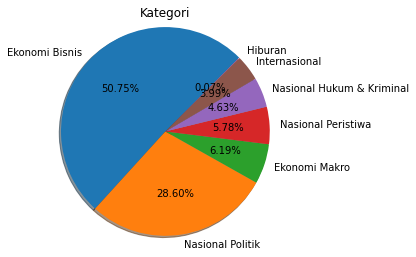

                    Kategori  Jumlah
0             Ekonomi Bisnis    2951
1           Nasional Politik    1663
2              Ekonomi Makro     360
3         Nasional Peristiwa     336
4  Nasional Hukum & Kriminal     269
5              Internasional     232
6                    Hiburan       4


In [951]:
def attend():
#     buat dataframe baru dari kolom [1]
    att = result['Kategori'].value_counts().rename_axis("Kategori").reset_index(name='Jumlah')
#     replace value
#     att['Kategori'].replace(0, "A", inplace=True)
#     att['Kategori'].replace(1, "B", inplace=True)
#     att['Kategori'].replace(2, "C", inplace=True)

#     tentukan sumbu
    x = att["Kategori"]
    y = att['Jumlah']
#     jumlah total
    a = len(att["Kategori"])
#     buat persentase
    exp = y/a**10

    plt.title("Kategori")
    plt.pie(y, labels = x, startangle = 45,
            explode=exp, shadow = True,
           autopct = '%1.2f%%',
           radius = 1.2,)
    plt.show()
    att = pd.DataFrame(att)
    att
    print(att)
attend()

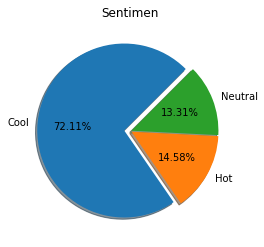

  Sentimen  Jumlah
0     Cool    4193
1      Hot     848
2  Neutral     774


In [952]:
def attend():
#     buat dataframe baru dari kolom [1]
    att = result['Sentimen'].value_counts().rename_axis("Sentimen").reset_index(name='Jumlah')

#     tentukan sumbu
    x = att["Sentimen"]
    y = att['Jumlah']
#     jumlah total
    a = len(att["Sentimen"])
#     buat persentase
    exp = y/a**10

    plt.title("Sentimen")
    plt.pie(y, labels = x, startangle = 45,
            explode=exp, shadow = True,
           autopct = '%1.2f%%')
    plt.show()
    att = pd.DataFrame(att)
    att
    print(att)
attend()

<center>-- Terima Kasih -- <br> -- Seno Alrianto --